Red Neuronal Convolucional

## Ejemplo

In [ ]:
# Descargue las imágenes a usar en el ejemplo por medio del siguiente enlace utilizando un navegador web
#https://drive.google.com/file/d/1lmBD5jmToC8Aix_suMb_autmxGHdOMXN/view?usp=sharing

In [1]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing import image
import numpy as np
import shutil

In [2]:
from google.colab import drive
#montamos drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!unrar x "/content/drive/MyDrive/horse_human.rar" -d "/content/drive/MyDrive/Imgs_CNN/"


UNRAR 5.61 beta 1 freeware      Copyright (c) 1993-2018 Alexander Roshal


Extracting from /content/drive/MyDrive/horse_human.rar

Creating    /content/drive/MyDrive/Imgs_CNN                           OK
Creating    /content/drive/MyDrive/Imgs_CNN/horse_human               OK
Creating    /content/drive/MyDrive/Imgs_CNN/horse_human/entrenamiento  OK
Creating    /content/drive/MyDrive/Imgs_CNN/horse_human/entrenamiento/caballos  OK
Extracting  /content/drive/MyDrive/Imgs_CNN/horse_human/entrenamiento/caballos/horse (1).png       0%  OK 
Extracting  /content/drive/MyDrive/Imgs_CNN/horse_human/entrenamiento/caballos/horse (10).png       0%  OK 
Extracting  /content/drive/MyDrive/Imgs_CNN/horse_human/entrenamiento/caballos/horse (100).png       0%  OK 
Extracting  /content/drive/MyDrive/Imgs_CNN/horse_human/entrenamiento/caballos/horse (101).png       0%  OK 
Extracting  /content/drive/MyDrive/Imgs_CNN/horse_human/entrenamiento/caballos/horse (102).png  

In [5]:
carpeta_base = "/content/drive/MyDrive/Imgs_CNN/horse_human"
dir_ent = os.path.join(carpeta_base, 'entrenamiento')
#os.mkdir(dir_ent)
dir_val = os.path.join(carpeta_base, 'validacion')
#os.mkdir(dir_val)
dir_ent_cab = os.path.join(dir_ent, 'caballos')
#os.mkdir(dir_ent_cab)
dir_ent_hum = os.path.join(dir_ent, 'humanos')
#os.mkdir(dir_ent_hum)
dir_val_cab = os.path.join(dir_val, 'caballos')
#os.mkdir(dir_val_cab)
dir_val_hum = os.path.join(dir_val, 'humanos')
#os.mkdir(dir_val_hum)

In [6]:
num_ima_cab = 500
num_ima_hum = 527
porc_separacion = 0.2
# caballos
num_ima_pru_cab = np.round(porc_separacion * num_ima_cab)
num_ima_ent_cab = np.round(num_ima_cab - num_ima_pru_cab)
# humanos
num_ima_pru_hum = np.round(porc_separacion * num_ima_hum)
num_ima_ent_hum = np.round(num_ima_hum - num_ima_pru_hum)

In [7]:
# img caballos
fnames = ['horse ({}).png'.format(i+1) for i in range(int(num_ima_ent_cab))]
for fname in fnames:
    src = os.path.join(carpeta_base+"/horses", fname)
    dst = os.path.join(dir_ent_cab, fname)
    shutil.copyfile(src, dst)

fnames = ['horse ({}).png'.format(i+1) for i in range(int(num_ima_ent_cab), num_ima_cab)]
for fname in fnames:
    src = os.path.join(carpeta_base+"/horses", fname)
    dst = os.path.join(dir_val_cab, fname)
    shutil.copyfile(src, dst)

# img humanos
fnames = ['human ({}).png'.format(i+1) for i in range(int(num_ima_ent_hum))]
for fname in fnames:
    src = os.path.join(carpeta_base+"/humans", fname)
    dst = os.path.join(dir_ent_hum, fname)
    shutil.copyfile(src, dst)

fnames = ['human ({}).png'.format(i+1) for i in range(int(num_ima_ent_hum), num_ima_hum)]
for fname in fnames:
    src = os.path.join(carpeta_base+"/humans", fname)
    dst = os.path.join(dir_val_hum, fname)
    shutil.copyfile(src, dst)

In [8]:
print('Total muestras de entrenamiento de caballos:', len(os.listdir(dir_ent_cab)))
print('Total muestras de entrenamiento de humanos:', len(os.listdir(dir_ent_hum)))
print('Total muestras de validación de caballos:', len(os.listdir(dir_val_cab)))
print('Total muestras de validación de humanos:', len(os.listdir(dir_val_hum)))

Total muestras de entrenamiento de caballos: 400
Total muestras de entrenamiento de humanos: 422
Total muestras de validación de caballos: 100
Total muestras de validación de humanos: 105


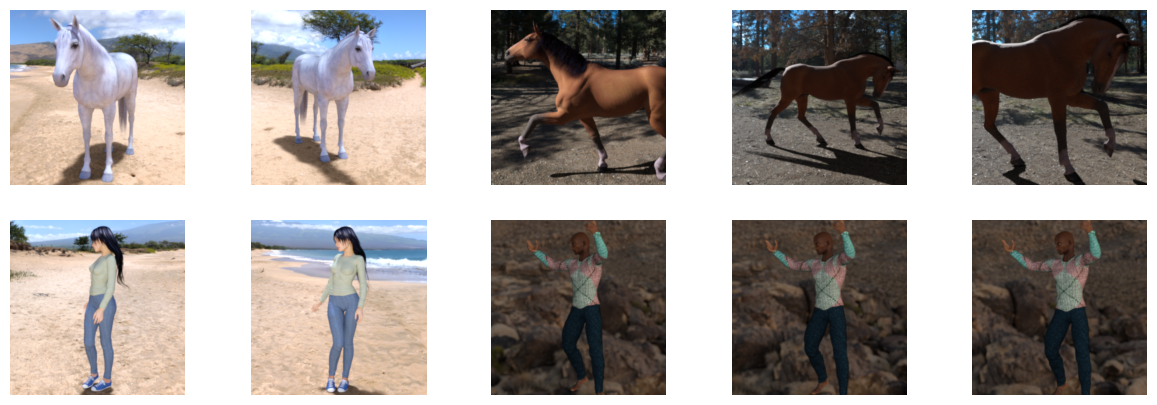

In [9]:
import matplotlib.image as mpimg
# se muestran algunas imagenes    
nom_cab_ent = os.listdir(dir_ent_cab)
nom_hum_ent = os.listdir(dir_ent_hum)

plt.figure(figsize=(15,5))
img_caballos = [os.path.join(dir_ent_cab, fname) for fname in nom_cab_ent[:5]]
img_humanos = [os.path.join(dir_ent_hum, fname) for fname in nom_hum_ent[:5]]

for i, img_path in enumerate(img_caballos + img_humanos ):  
    sp = plt.subplot(2, 5, i + 1)
    sp.axis('Off') # no se muestran los ejes
    img = mpimg.imread(img_path)
    plt.imshow(img)
plt.show()

In [10]:
# se configura la red
from tensorflow.keras import layers
from tensorflow.keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(300, 300, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 128)      0

In [11]:
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [ ]:
#callback = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss',
 #                                          patience=3,
  #                                         restore_best_weights=True)

In [12]:
# preprocesamiento de datos
from tensorflow.keras.preprocessing.image import ImageDataGenerator
gen_datos_ent = ImageDataGenerator(rescale=1./255)

# entrenamiento
gen_ent = gen_datos_ent.flow_from_directory(
        dir_ent, 
        target_size=(300, 300),  
        batch_size=32,       
        class_mode='binary')
# prueba
gen_datos_pru = ImageDataGenerator(rescale=1./255)
gen_val = gen_datos_pru.flow_from_directory(
                  dir_val,
                  target_size=(300, 300),
                  batch_size=32,
                  class_mode='binary')

Found 822 images belonging to 2 classes.
Found 205 images belonging to 2 classes.


In [13]:
history = model.fit(gen_ent, steps_per_epoch=10, epochs=10,validation_data=gen_val,
                             validation_steps=50, verbose=1)

Epoch 1/10
10/10 [==============================] - ETA: 0s - loss: 0.6874 - acc: 0.5875

10/10 [==============================] - 20s 613ms/step - loss: 0.6874 - acc: 0.5875 - val_loss: 0.6612 - val_acc: 0.5220
Epoch 2/10
10/10 [==============================] - 5s 509ms/step - loss: 0.5899 - acc: 0.6742
Epoch 3/10
10/10 [==============================] - 3s 283ms/step - loss: 0.4691 - acc: 0.8281
Epoch 4/10
10/10 [==============================] - 3s 284ms/step - loss: 0.3582 - acc: 0.8531
Epoch 5/10
10/10 [==============================] - 4s 349ms/step - loss: 0.1987 - acc: 0.9548
Epoch 6/10
10/10 [==============================] - 3s 287ms/step - loss: 0.1587 - acc: 0.9469
Epoch 7/10
10/10 [==============================] - 3s 278ms/step - loss: 0.1465 - acc: 0.9355
Epoch 8/10
10/10 [==============================] - 4s 452ms/step - loss: 0.0853 - acc: 0.9774
Epoch 9/10
10/10 [==============================] - 3s 286ms/step - loss: 0.1496 - acc: 0.9312
Epoch 10/10
10/10 [==============================] - 3s 294ms/step - loss: 0.0536 - acc: 0.9906


In [ ]:
#model.fit(gen_ent, steps_per_epoch=10, epochs=10,validation_data=gen_val,
                             #validation_steps=50, verbose=1, callbacks=callback)

In [14]:
loss, accuracy = model.evaluate(gen_val)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

7/7 [==============================] - 2s 306ms/step - loss: 0.2233 - acc: 0.9024
Loss:  0.22329945862293243
Accuracy:  0.9024389982223511


In [15]:
model.save('modelo.h5')

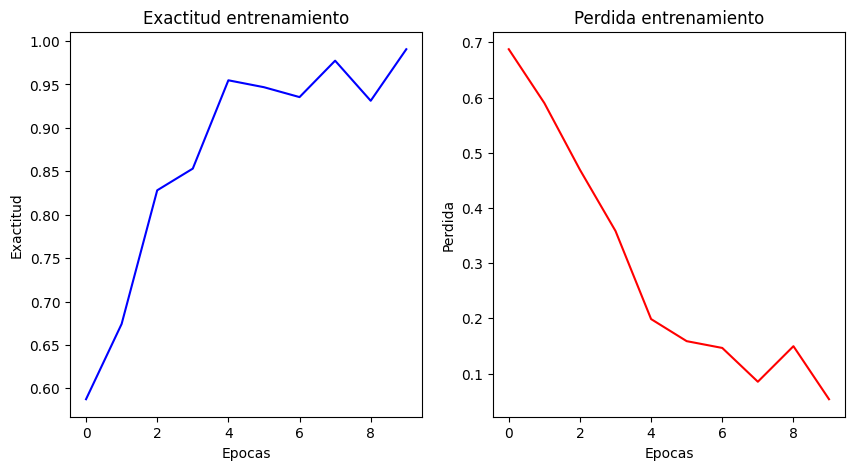

In [16]:
def dibujarGraficas():
    plt.figure(figsize=(10,5))    
    n = np.arange(0, 10)
    plt.subplot(121)
    plt.title('Exactitud entrenamiento')
    plt.plot(n, history.history['acc'],'b')    
    plt.xlabel("Epocas")
    plt.ylabel("Exactitud")   
    
    plt.subplot(122)
    plt.title('Perdida entrenamiento')
    plt.plot(n, history.history['loss'],'r')
    plt.xlabel("Epocas")
    plt.ylabel("Perdida")    
    plt.show()
dibujarGraficas()

In [17]:
print("Exactitud datos validación: {:.2f}".format(history.history['val_acc'][-1]))

Exactitud datos validación: 0.52


## Aumento de datos

In [18]:
# preprocesamiento de datos
gen_datos_ent = ImageDataGenerator(rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest'
)

# entrenamiento
gen_ent = gen_datos_ent.flow_from_directory(
        dir_ent, 
        target_size=(300, 300),  
        batch_size=32,       
        class_mode='binary')

Found 822 images belonging to 2 classes.


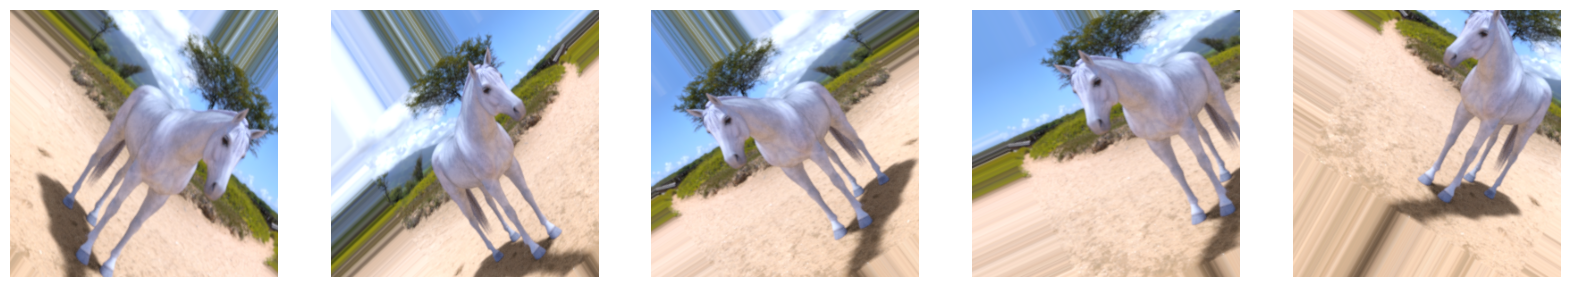

In [19]:
from keras.utils import load_img, img_to_array
img_path = img_caballos[1]
img = load_img(img_path, target_size=(300, 300))

x = img_to_array(img)
x = x.reshape((1,) + x.shape)
gen = gen_datos_ent.flow(x, batch_size=1)

plt.figure(figsize=(20,10))
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze())
    plt.plot()
plt.show()

In [20]:
history = model.fit(gen_ent, steps_per_epoch=10, epochs=10,validation_data=gen_val,
                             validation_steps=50, verbose=1)

Epoch 1/10
10/10 [==============================] - ETA: 0s - loss: 0.5391 - acc: 0.7656

10/10 [==============================] - 12s 1s/step - loss: 0.5391 - acc: 0.7656 - val_loss: 0.4788 - val_acc: 0.7610
Epoch 2/10
10/10 [==============================] - 9s 908ms/step - loss: 0.5192 - acc: 0.7250
Epoch 3/10
10/10 [==============================] - 8s 799ms/step - loss: 0.4735 - acc: 0.7500
Epoch 4/10
10/10 [==============================] - 8s 788ms/step - loss: 0.4640 - acc: 0.7806
Epoch 5/10
10/10 [==============================] - 9s 918ms/step - loss: 0.4565 - acc: 0.7656
Epoch 6/10
10/10 [==============================] - 9s 856ms/step - loss: 0.4263 - acc: 0.7875
Epoch 7/10
10/10 [==============================] - 8s 799ms/step - loss: 0.4412 - acc: 0.8062
Epoch 8/10
10/10 [==============================] - 9s 845ms/step - loss: 0.3861 - acc: 0.8344
Epoch 9/10
10/10 [==============================] - 9s 920ms/step - loss: 0.3655 - acc: 0.8313
Epoch 10/10
10/10 [==============================] - 8s 843ms/step - loss: 0.3691 - acc: 0.8125


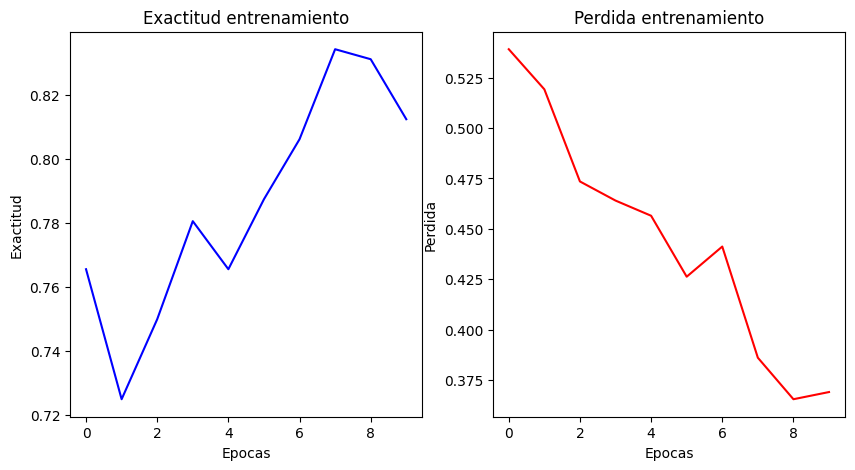

In [21]:
dibujarGraficas()

In [22]:
print("Exactitud datos validación: {:.2f}".format(history.history['val_acc'][-1]))

Exactitud datos validación: 0.76


In [27]:
path_img = '/content/imgen2.jpeg'
img = load_img(path_img, target_size=(300, 300))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
prediccion = model.predict(images)
if prediccion[0]>0.5:
  print("Es humano")
else:
  print("Es un caballo")

1/1 [==============================] - 0s 30ms/step
Es un caballo


In [28]:
model.save('modelo.h5')